In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay

In [2]:
tss_linear = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_linear.csv")
tss_nonlinear = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_nonlinear.csv")
tss_cell = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cell.csv")
tss_cellcluster = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_cellcluster.csv")
tss_supercell = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_supercell.csv")
tss_embeddedsup = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/tss_era5_embeddedsup.csv")

In [3]:
csi_linear = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_linear.csv")
csi_nonlinear = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_nonlinear.csv")
csi_cell = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cell.csv")
csi_cellcluster = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_cellcluster.csv")
csi_supercell = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_supercell.csv")
csi_embeddedsup = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/csi_era5_embeddedsup.csv")

In [4]:
auc_linear = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_linear.csv")
auc_nonlinear = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_nonlinear.csv")
auc_cell = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_cell.csv")
auc_cellcluster = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_cellcluster.csv")
auc_supercell = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_supercell.csv")
auc_embeddedsup = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/skill_scores/auc_era5_embeddedsup.csv")

In [5]:
#Create a list of indices for the paper (of around 50)

ind_list = [\
            #Wind indices
            "Umean06","Umean01","U10","wg10_2","s06","ebwd","Umeanwindinf","srhe_left","srh06_left",\
            #Downburst indices
            "dmi","lr_subcloud","lr_freezing","lr03","lr13","wmsi_ml","bdsd","hmi","convgust_wet","convgust_dry",\
            "gustex","dmgwind","dmgwind_fixed","dcape","wmpi","windex","ddraft_temp","te_diff","tei","wndg",\
            #Storm mode
            "dcp","scp","scp_fixed",\
            #Severe storm indices
            "sherb","eff_sherb","sweat","mucape*s06","mlcape*s06","effcape*s06","t_totals","k_index",\
            #Instability indices
            "eff_cape","eff_lcl","ml_cape","ml_lcl","mu_cape","mu_lcl","qmean01","qmean06",\
           ]

renames = {
         'Umean06': "Umean06",
         'Umean01': "Umean01",
         'U10': "U10",
         'wg10_2': "WindGust10",
         's06': "S06",
         'ebwd': "EBWD",
         'Umeanwindinf': "Umeanwindinf",
         'srhe_left': "SRHE",
         'srh06_left': "SRH06",
         'dmi': "DMI",
         'lr_subcloud': "LR-subcloud",
         'lr_freezing': "LR-freezing",
         'lr03': "LR03",
         'lr13': "LR13",
         'wmsi_ml': "WMSI",
         'bdsd': "BDSD",
         'bdsd_cv': "BDSD (CV)",
         'hmi': "HMI",
         'convgust_wet': "ConvGust\n(wet)",
         'convgust_dry': "ConvGust\n(dry)",
         'gustex': "GUSTEX",
         'dmgwind': "DmgWind",
         'dmgwind_fixed': "DmgWind\n(fixed)",
         'dcape': "DCAPE",
         'wmpi': "WMPI",
         'windex': "WINDEX",
         'ddraft_temp': "DowndraftTemp",
         'te_diff': "ThetaeDiff",
         'tei': "TEI",
         'wndg': "WNDG",
         'dcp': "DCP",
         'scp': "SCP",
         'scp_fixed': "SCP (fixed)",
         'sherb': "SHERB",
         'eff_sherb': "SHERBE",
         'sweat': "SWEAT",
         'mucape*s06': "MUCS6",
         'mlcape*s06': "MLCS6",
         'effcape*s06': "EffCS6",
         't_totals': "T-Totals",
         'k_index': "K-Index",
         'eff_cape': "Eff-CAPE",
         'eff_lcl': "Eff-LCL",
         'ml_cape': "MLCAPE",
         'ml_lcl': "ML-LCL",
         'mu_cape': "MUCAPE",
         'mu_lcl': "MU-LCL",
         'qmean01': "Qmean01",
         'qmean06': "Qmean06"}

In [6]:
tss_linear = tss_linear[ind_list]
tss_nonlinear = tss_nonlinear[ind_list]
tss_cell = tss_cell[ind_list]
tss_cellcluster = tss_cellcluster[ind_list]
tss_supercell = tss_supercell[ind_list]
tss_embeddedsup = tss_embeddedsup[ind_list]

auc_linear = auc_linear[ind_list]
auc_nonlinear = auc_nonlinear[ind_list]
auc_cell = auc_cell[ind_list]
auc_cellcluster = auc_cellcluster[ind_list]
auc_supercell = auc_supercell[ind_list]
auc_embeddedsup = auc_embeddedsup[ind_list]

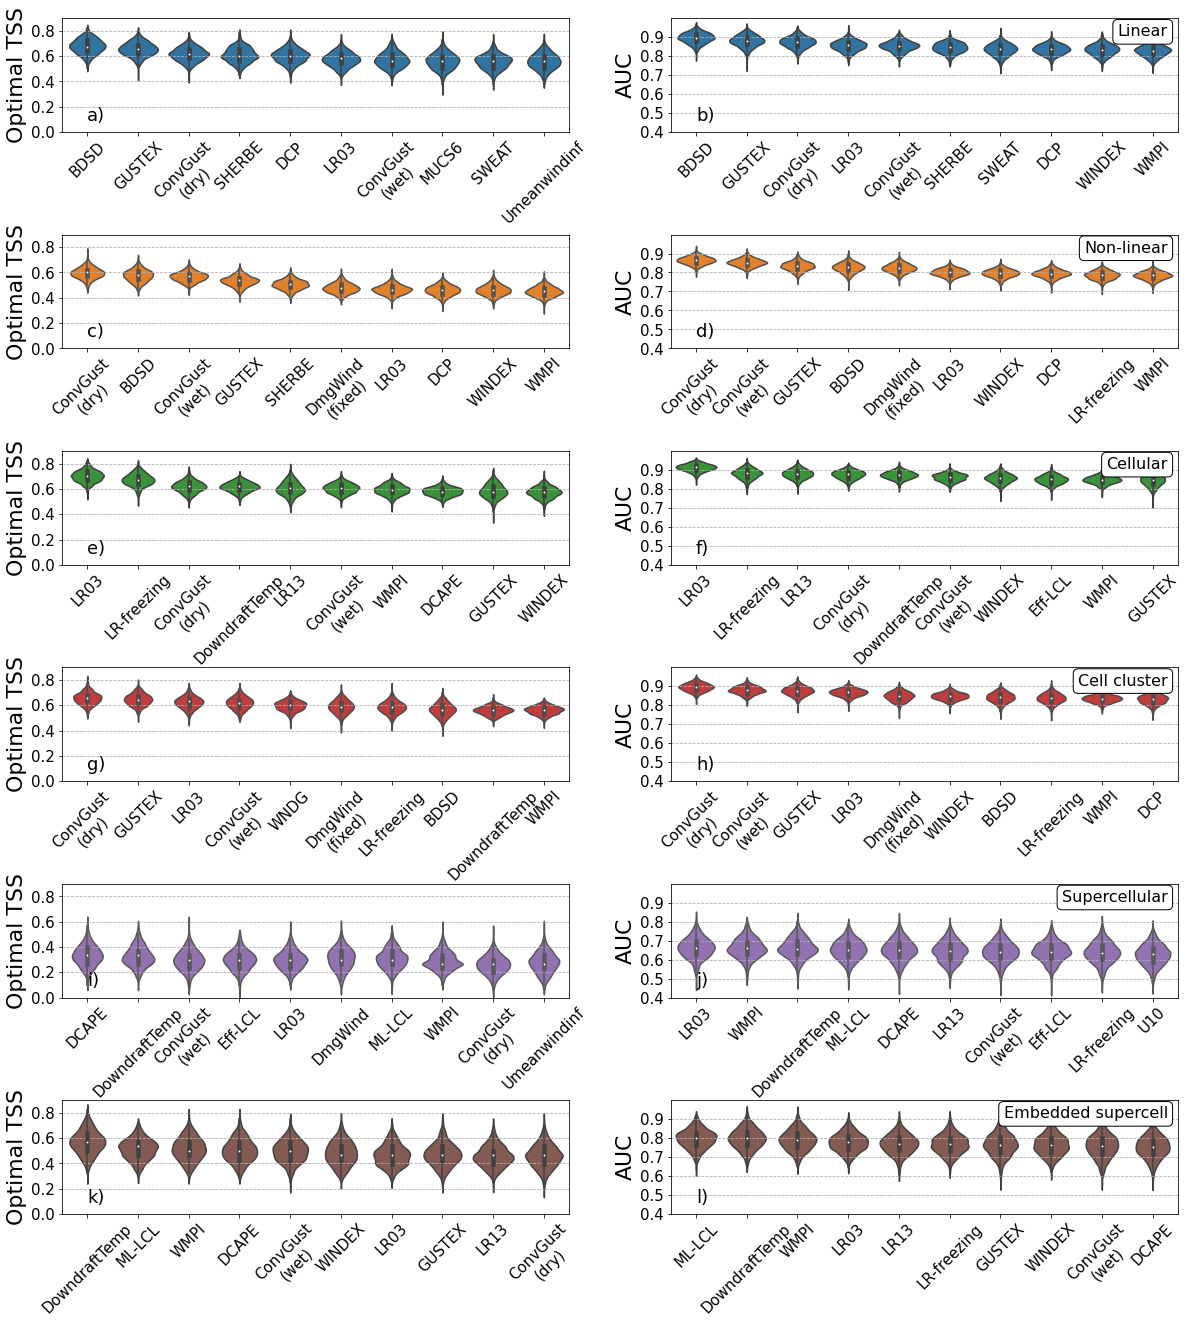

In [7]:
def plot(data, ax, color, y1, renames, ylabel, letter, y2=0.8, yticks=None):
    
    if yticks is None:
        yticks=np.arange(y1,y2+0.1,0.1)
    
    sns.violinplot(data=data.rename(columns=renames),color=color)
    plt.gca().tick_params(axis="x",labelrotation=45)
    plt.yticks(yticks)
    plt.ylim([y1,y2])
    plt.gca().tick_params(labelsize=15)
    plt.ylabel(ylabel,size=22)
    plt.xlabel("")
    plt.gca().grid(axis="y",ls="--")
    ax.text(0.05,0.1,letter+")",transform=ax.transAxes,size=18)


p = [plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]
# renames = {"ship":"SHIP", "k_index":"K-index", "ml_cape":"MLCAPE", "srhe_left":"SRHE", \
#          "ml_el":"MLEL", "mu_cape":"MUCAPE", "eff_cape":"Eff-CAPE", "sb_cape":"SBCAPE", "eff_lcl":"Eff-LCL",\
#          "wmsi_ml":"WMSI", "dcp":"DCP", "mlcape*s06":"MLCS6", "eff_sherb":"SHERBE", "ebwd":"EBWD",\
#          "mu_el":"MUEL", "eff_el":"Eff-EL", "sb_el":"SBEL", "mucape*s06":"MUCS6", "sweat":"SWEAT",\
#          "Umean800_600":"Umean800-600", "Ust_left":"Ust", "sherb":"SHERB", "t_totals":"T-totals", \
#          "scp_fixed":"SCP (fixed)","scp":"SCP", "dmgwind_fixed":"DmgWind-Fixed", "lr36":"LR36", "lr_freezing":"LR-Freezing", \
#          "srh06_left":"SRH06", "s06":"S06", "wg10":"WindGust10", "srh01_left":"SRH01",\
#          "qmeansubcloud":"Qmeansubcloud", "s010":"S010", "effcape*s06":"Eff-CS6", "mmp":"MMP",\
#          "sbcape*s06":"SBCS6", "q_melting":"Qmelting", "gustex":"GUSTEX", "pwat":"PWAT",\
#          "qmean06":"Qmean06","q3":"Q3","qmean03":"Qmean03","s03":"S03",\
#          "convgust_dry":"ConvGust-Dry","cp":"ConvPrcp","dpd700":"DPD700","Umeanwindinf":"Umeanwindinf",\
#          "v_totals":"V-Totals","c_totals":"C-Totals","qmean01":"Qmean01","mhgt":"MHGT",\
#          "wbz":"WBZ","sfc_thetae":"Sfc-ThetaE","q1":"Q1","te_diff":"TED","rhmin13":"RHMin03","Uwindinf":"Uwindinf",\
#         "Umean06":"Umean06","U3":"U3","U500":"U500","U6":"U6","Umean03":"Umean03","U1":"U1",\
#           "bdsd":"BDSD","bdsd_cv":"BDSD CV","mod_cape*s06":"CS6","mod_cape":"CAPE"}


col=2
plt.figure(figsize=[20,22])
plt.subplots_adjust(hspace=0.9)
cnt_pos=1
cnt_ind=0
colors = [plt.get_cmap("tab10")(i) for i in np.arange(6)]
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']
for tss, csi, auc, class2 in zip([tss_linear,tss_nonlinear,tss_cell,tss_cellcluster,tss_supercell,tss_embeddedsup],
                       [csi_linear,csi_nonlinear,csi_cell,csi_cellcluster,csi_supercell,csi_embeddedsup],
                       [auc_linear,auc_nonlinear,auc_cell,auc_cellcluster,auc_supercell,auc_embeddedsup],
                       ["Linear","Non-linear","Cellular","Cell cluster","Supercellular","Embedded supercell"]):
    
        sort_tss = tss.median(axis=0).sort_values(ascending=False).index.values[0:10]
        sort_csi = csi.median(axis=0).sort_values(ascending=False).index.values[0:10]    
        

        plot(tss.loc[:,sort_tss], plt.subplot(6,col,cnt_pos),colors[cnt_ind],0,renames,"Optimal TSS",letters[cnt_pos-1],y2=0.9,yticks=np.arange(0,1,0.2))
        #plot(csi.loc[:,sort_csi], plt.subplot(6,col,cnt_pos+1),colors[cnt_ind],0.4,renames,"Optimal TSS",letters[cnt_pos],y2=0.9,yticks=np.arange(0,1,0.2))
        try:    
            sort_auc = auc.median(axis=0).sort_values(ascending=False).index.values[0:10]        
            plot(auc.loc[:,sort_auc], plt.subplot(6,col,cnt_pos+1),colors[cnt_ind],0.4,renames,"AUC",letters[cnt_pos],y2=1,yticks=np.arange(0,1,0.1))    
        except:
            pass
        
        plt.gca().text(0.98,0.84,class2,transform=plt.gca().transAxes,size=16,ha="right",bbox={"boxstyle":'round',"facecolor":"white"})
    
        cnt_pos=cnt_pos+col
        cnt_ind=cnt_ind+1
    
plt.savefig("/g/data/eg3/ab4502/figs/ExtremeWind/skill_in10km_storm_class.jpeg",bbox_inches="tight")